# 🔧 02 - Data Preprocessing
## E-commerce Customer Behavior Analysis

**Tujuan Notebook:**
- Handle missing values
- Encoding categorical features
- Scaling numerik
- Feature engineering dasar
- Simpan data ke `data/processed/`

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path
sys.path.insert(0, os.path.abspath('../src'))
from preprocessing import (
    load_data, clean_data, check_missing_values,
    encode_categorical, scale_features, save_processed_data
)
from features import create_all_features, get_feature_summary

# Create directories
os.makedirs('../data/processed', exist_ok=True)

print('✅ Libraries imported successfully!')

✅ Libraries imported successfully!


---
## 1. Load Raw Data

In [2]:
# Load data
df_raw = load_data('../data/raw/E-commerce Customer Behavior - Sheet1.csv')
print(f"\n📊 Original shape: {df_raw.shape}")
df_raw.head()

✅ Data loaded: 350 rows, 11 columns

📊 Original shape: (350, 11)


,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
# Check missing values before cleaning
print("⚠️ Missing Values Check:")
missing_df = check_missing_values(df_raw)
if missing_df.empty:
    print("   No missing values found!")
else:
    display(missing_df)

⚠️ Missing Values Check:


,column,missing_count,missing_percentage
10,Satisfaction Level,2,0.571429


---
## 2. Data Cleaning

In [4]:
# Clean data using preprocessing module
df_clean = clean_data(df_raw)


🔧 Starting Data Cleaning Pipeline...
✅ Data types fixed
  → Satisfaction Level: filled with mode = Satisfied
✅ Missing values handled
✅ Cleaning complete: 350 rows retained


In [5]:
# Verify cleaning
print("\n✅ Post-Cleaning Verification:")
print(f"   • Rows: {len(df_clean)}")
print(f"   • Columns: {len(df_clean.columns)}")
print(f"   • Missing values: {df_clean.isnull().sum().sum()}")
df_clean.info()


✅ Post-Cleaning Verification:
   • Rows: 350
   • Columns: 11
   • Missing values: 0
<class 'pandas.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    str    
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    str    
 4   Membership Type           350 non-null    str    
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        350 non-null    str    
dtypes: bool(1), float64(2), int64(4), str(4)
memory usage: 27.8 KB


In [6]:
# Save cleaned data
save_processed_data(df_clean, '../data/processed/customer_cleaned.csv')

✅ Data saved to: ../data/processed/customer_cleaned.csv


---
## 3. Feature Engineering

In [7]:
# Apply all feature engineering
df_features = create_all_features(df_clean)


🛠️ Starting Feature Engineering Pipeline...
✅ Created Customer_Value_Score (mean: 0.438)
✅ Created engagement metrics:
   → Recency distribution: {'Medium': 159, 'Recent': 136, 'Inactive': 55}
   → Active customers: 226 (64.6%)
✅ Created risk indicators:
   → Risk distribution: {'Low': 176, 'High': 126, 'Medium': 48}
   → Avg churn risk score: 0.442
✅ Created membership features
✅ Created demographic features
✅ Feature engineering complete: 22 total columns


In [8]:
# View new features
new_cols = [col for col in df_features.columns if col not in df_clean.columns]
print(f"\n🆕 New Features Created ({len(new_cols)}):")
for col in new_cols:
    print(f"   • {col}")

df_features[new_cols].head(10)


🆕 New Features Created (11):
   • Customer_Value_Score
   • Recency_Category
   • Spend_Per_Item
   • Is_Active
   • Churn_Risk_Score
   • Risk_Level
   • Membership_Value
   • Is_Premium
   • Spend_Efficiency
   • Age_Group
   • City_Tier


,Customer_Value_Score,Recency_Category,Spend_Per_Item,Is_Active,Churn_Risk_Score,Risk_Level,Membership_Value,Is_Premium,Spend_Efficiency,Age_Group,City_Tier
0,0.658433,Medium,80.014286,True,0.197252,Low,3,True,0.854368,Young,1
1,0.392708,Recent,70.954545,True,0.388606,Low,2,False,1.042846,Middle,1
2,0.142056,Inactive,56.750000,False,0.797742,High,1,False,1.078923,Senior,2
3,0.911213,Recent,77.910526,True,0.051142,Low,3,True,1.129014,Middle,1
4,0.398104,Inactive,55.415385,False,0.774705,High,2,False,0.962545,Young,2
5,0.048036,Medium,55.100000,True,0.592045,Medium,1,False,0.931159,Middle,2
6,0.675034,Medium,76.706667,True,0.225744,Low,3,True,0.877554,Middle,1
7,0.437282,Recent,66.741667,True,0.346763,Low,2,False,1.070103,Middle,1
8,0.189474,Medium,49.525000,False,0.760559,High,1,False,1.046180,Senior,2
9,0.984211,Recent,72.385714,True,0.013158,Low,3,True,1.159369,Young,1


In [9]:
# Feature Summary Statistics
print("\n📊 Feature Statistics:")
get_feature_summary(df_features)


📊 Feature Statistics:


,count,mean,std,min,25%,50%,75%,max,missing
Customer ID,350.0,275.500000,101.180532,101.000000,188.250000,275.500000,362.750000,450.000000,0
Age,350.0,33.597143,4.870882,26.000000,30.000000,32.500000,37.000000,43.000000,0
Total Spend,350.0,845.381714,362.058695,410.800000,502.000000,775.200000,1160.600000,1520.100000,0
Items Purchased,350.0,12.600000,4.155984,7.000000,9.000000,12.000000,15.000000,21.000000,0
Average Rating,350.0,4.019143,0.580539,3.000000,3.500000,4.100000,4.500000,4.900000,0
Days Since Last Purchase,350.0,26.588571,13.440813,9.000000,15.000000,23.000000,38.000000,63.000000,0
Customer_Value_Score,350.0,0.437622,0.305904,0.019395,0.161325,0.399811,0.686159,0.992788,0
Spend_Per_Item,350.0,65.228958,8.997629,49.525000,57.366667,67.030000,73.025000,83.592857,0
Churn_Risk_Score,350.0,0.442209,0.277337,0.004057,0.198837,0.396969,0.740041,0.855594,0
Membership_Value,350.0,2.002857,0.817076,1.000000,1.000000,2.000000,3.000000,3.000000,0


---
## 4. Categorical Encoding

In [10]:
# Encode categorical features
categorical_cols = ['Gender', 'City', 'Membership Type', 'Satisfaction Level']
print("🔄 Label Encoding:")
df_encoded, encoders = encode_categorical(df_features, categorical_cols, method='label')

🔄 Label Encoding:
  → Gender: {'Female': 0, 'Male': 1}
  → City: {'Chicago': 0, 'Houston': 1, 'Los Angeles': 2, 'Miami': 3, 'New York': 4, 'San Francisco': 5}
  → Membership Type: {'Bronze': 0, 'Gold': 1, 'Silver': 2}
  → Satisfaction Level: {'Neutral': 0, 'Satisfied': 1, 'Unsatisfied': 2}
✅ Categorical encoding completed (label)


In [11]:
# View encoded columns
encoded_cols = [col for col in df_encoded.columns if '_encoded' in col]
print("\n📋 Encoded Columns:")
df_encoded[['Customer ID'] + categorical_cols + encoded_cols].head(10)


📋 Encoded Columns:


,Customer ID,Gender,City,Membership Type,Satisfaction Level,Gender_encoded,City_encoded,Membership Type_encoded,Satisfaction Level_encoded
0,101,Female,New York,Gold,Satisfied,0,4,1,1
1,102,Male,Los Angeles,Silver,Neutral,1,2,2,0
2,103,Female,Chicago,Bronze,Unsatisfied,0,0,0,2
3,104,Male,San Francisco,Gold,Satisfied,1,5,1,1
4,105,Male,Miami,Silver,Unsatisfied,1,3,2,2
5,106,Female,Houston,Bronze,Neutral,0,1,0,0
6,107,Female,New York,Gold,Satisfied,0,4,1,1
7,108,Male,Los Angeles,Silver,Neutral,1,2,2,0
8,109,Female,Chicago,Bronze,Unsatisfied,0,0,0,2
9,110,Male,San Francisco,Gold,Satisfied,1,5,1,1


---
## 5. Feature Scaling

In [12]:
# Scale numeric features
numeric_cols_to_scale = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']
df_scaled, scaler = scale_features(df_encoded, numeric_cols_to_scale, method='standard')

✅ Features scaled (standard): ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Days Since Last Purchase']


In [13]:
# View scaled columns
scaled_cols = [col for col in df_scaled.columns if '_scaled' in col]
print("\n📊 Scaled Features Statistics:")
df_scaled[scaled_cols].describe().round(3)


📊 Scaled Features Statistics:


,Age_scaled,Total Spend_scaled,Items Purchased_scaled,Average Rating_scaled,Days Since Last Purchase_scaled
count,350.000,350.000,350.000,350.000,350.000
mean,0.000,0.000,0.000,-0.000,0.000
std,1.001,1.001,1.001,1.001,1.001
min,-1.562,-1.202,-1.349,-1.758,-1.310
25%,-0.740,-0.950,-0.867,-0.896,-0.863
50%,-0.226,-0.194,-0.145,0.139,-0.267
75%,0.700,0.872,0.578,0.829,0.850
max,1.933,1.866,2.024,1.519,2.713


---
## 6. Final Dataset Review

In [14]:
# Final dataset overview
print("=" * 60)
print("📊 FINAL DATASET OVERVIEW")
print("=" * 60)
print(f"\n📏 Shape: {df_scaled.shape[0]} rows × {df_scaled.shape[1]} columns")

print("\n📋 Column Categories:")
print(f"   • Original features: {len(df_raw.columns)}")
print(f"   • Engineered features: {len([c for c in df_scaled.columns if c not in df_raw.columns and '_encoded' not in c and '_scaled' not in c])}")
print(f"   • Encoded features: {len(encoded_cols)}")
print(f"   • Scaled features: {len(scaled_cols)}")
print(f"   • Total: {len(df_scaled.columns)}")

📊 FINAL DATASET OVERVIEW

📏 Shape: 350 rows × 31 columns

📋 Column Categories:
   • Original features: 11
   • Engineered features: 11
   • Encoded features: 4
   • Scaled features: 5
   • Total: 31


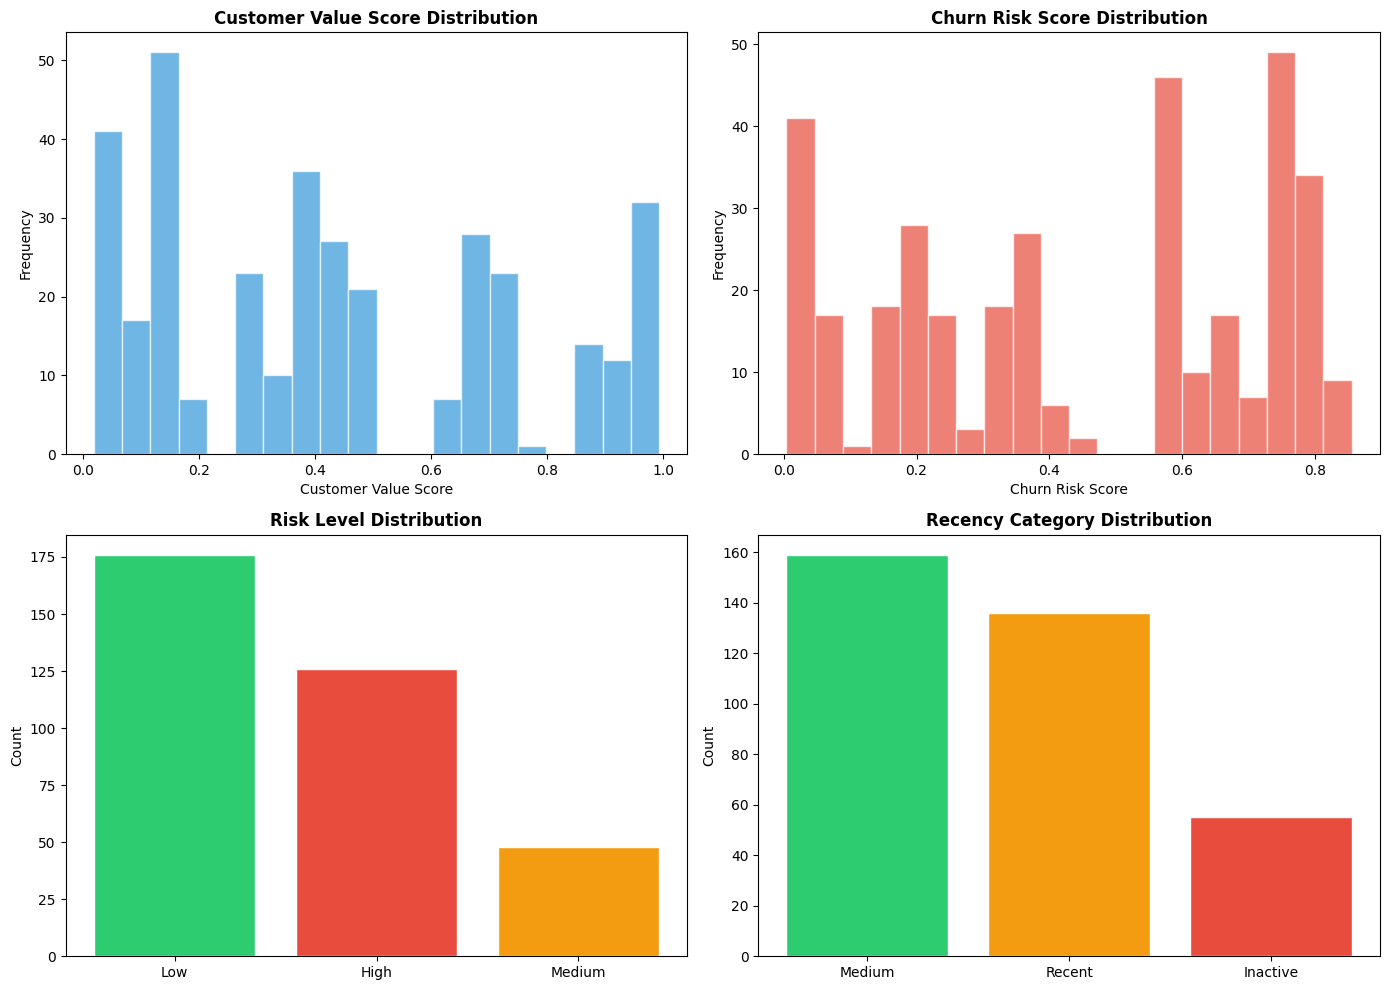

✅ Saved: 08_engineered_features.png


In [15]:
# Visualize new features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Customer Value Score Distribution
axes[0, 0].hist(df_scaled['Customer_Value_Score'], bins=20, edgecolor='white', alpha=0.7, color='#3498db')
axes[0, 0].set_xlabel('Customer Value Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Customer Value Score Distribution', fontweight='bold')

# Churn Risk Score Distribution
axes[0, 1].hist(df_scaled['Churn_Risk_Score'], bins=20, edgecolor='white', alpha=0.7, color='#e74c3c')
axes[0, 1].set_xlabel('Churn Risk Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Churn Risk Score Distribution', fontweight='bold')

# Risk Level Distribution
risk_counts = df_scaled['Risk_Level'].value_counts()
colors = {'Low': '#2ecc71', 'Medium': '#f39c12', 'High': '#e74c3c'}
axes[1, 0].bar(risk_counts.index, risk_counts.values, 
               color=[colors.get(x, '#3498db') for x in risk_counts.index], edgecolor='white')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Risk Level Distribution', fontweight='bold')

# Recency Category Distribution
recency_counts = df_scaled['Recency_Category'].value_counts()
axes[1, 1].bar(recency_counts.index, recency_counts.values, 
               color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='white')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Recency Category Distribution', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/08_engineered_features.png', dpi=150, bbox_inches='tight')
plt.show()
print('✅ Saved: 08_engineered_features.png')

---
## 7. Save Processed Data

In [16]:
# Save final processed dataset
save_processed_data(df_scaled, '../data/processed/customer_features.csv')

print("\n" + "=" * 60)
print("✅ DATA PREPROCESSING COMPLETE!")
print("=" * 60)
print("\n📁 Saved Files:")
print("   • data/processed/customer_cleaned.csv")
print("   • data/processed/customer_features.csv")
print("\n➡️ Next: 03_statistical_analysis.ipynb")
print("=" * 60)

✅ Data saved to: ../data/processed/customer_features.csv

✅ DATA PREPROCESSING COMPLETE!

📁 Saved Files:
   • data/processed/customer_cleaned.csv
   • data/processed/customer_features.csv

➡️ Next: 03_statistical_analysis.ipynb
